In [198]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# Load Dataset

In [199]:
poverty_data = pd.read_csv("CS132_DataSheet-graph_data.csv")

# Data Cleaning

In [200]:
poverty_data['Year'] = poverty_data['Year'].ffill() # fill gaps between years
poverty_data = poverty_data.drop(columns='Total')  # remove total column 

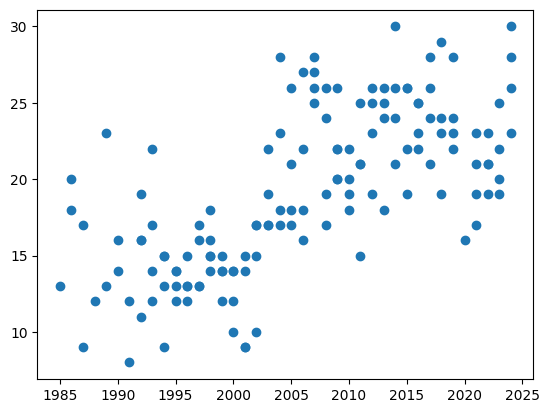

In [201]:
# y = mx + c
x = poverty_data['Year']
y = poverty_data['Not Poor']
plt.scatter(x, y)

# Data Split

## Import Library

In [202]:
from sklearn.model_selection import train_test_split

## Perform 80/20 Data split

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5)

In [204]:
X_train.shape, Y_train.shape

((71,), (71,))

## Convert X_train and X_test array from 1D to 2D

In [205]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
Y_test = np.array(Y_test)

# Regression

## Import library

In [206]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [207]:
model = linear_model.LinearRegression()

In [208]:
model.fit(X_train, Y_train)

LinearRegression()

In [209]:
Y_pred = model.predict(X_test)

In [210]:
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"R-squared: {r2_score(Y_test, Y_pred):.2f}")

Coefficient: [0.34048947]
Intercept: -663.82
Mean Squared Error: 12.79
R-squared: 0.50


Text(0, 0.5, 'Not Poor')

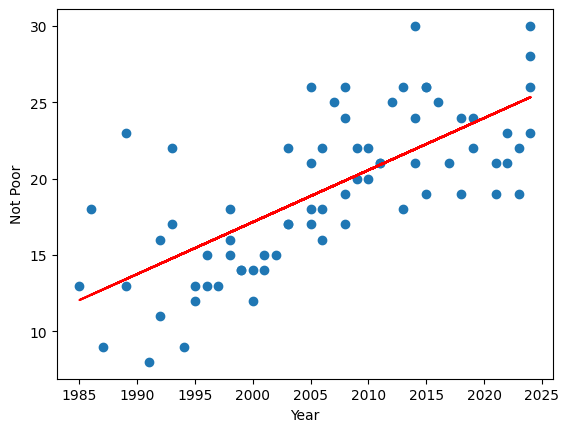

In [211]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color="red")
plt.xlabel("Year")
plt.ylabel("Not Poor")